In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Melihat informasi umum pada data

In [3]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Praktikum /Praktikum 3/Data/socr.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [4]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [ ]:
data pre - prosecing

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={
        "Height(Inches)": "tinggi_cm",
        "Weight(Pounds)": "berat_kg"
    })
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.453592
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()


,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Membagi Dataset untuk training training dan test

In [7]:
from sklearn.model_selection import train_test_split
x =df1[["tinggi_cm"]]
y=df1["berat_kg"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
    )
x_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


Traaining Model

In [8]:
from sklearn.linear_model import LinearRegression

# buat objek model instan dari class LinearRegression
model = LinearRegression()

# lakukan proses training
model.fit(x_train, y_train)


LinearRegression()

Evaluasi Model

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)


Koefisien (kg per cm): 0.5518217971118468
Intersep (kg): -37.656882325081
R2 (test): 0.24989238901493693
MAE (kg): 3.6704108331736673
RMSE (kg): 4.60900592355825


Cetak Persamaan Regresi

In [10]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")


Persamaan: y = 0.552 * x + -37.657


Plot Regresi

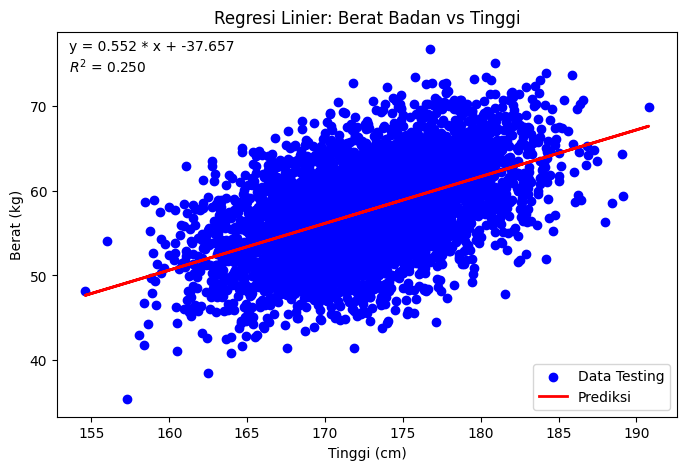

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Scatter plot data asli
plt.scatter(x_test, y_test, color="blue", label="Data Testing")

# Garis hasil prediksi
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Prediksi")

# Label dan judul
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linier: Berat Badan vs Tinggi")

# Menampilkan persamaan regresi dan nilai R² di dalam grafik
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    va="top"
)

# Menampilkan legenda dan grafik
plt.legend()
plt.show()


In [14]:
df_ti2022 = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Praktikum /Praktikum 3/Data/berat_ti.csv',sep=';')
df_ti2022

,No,Nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Kayla,160,70.3
4,5,Bani,183,65.8


In [15]:
##ambil X_testing
x_testing = df_ti2022[['tinggi_cm']]
x_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [16]:
y_pred_testing = model.predict(x_testing)
df_ti2022['berat_kg'] =y_pred_testing
df_ti2022

,No,Nama,tinggi_cm,actual_berat,berat_kg
0,1,Rafa,168,58.5,55.049180
1,2,Tiara,162,78.2,51.738249
2,3,Tia,155,52.7,47.875496
3,4,Kayla,160,70.3,50.634605
4,5,Bani,183,65.8,63.326507


In [17]:
data = pd.read_csv("/content/gdrive/MyDrive/Machine Learning/Praktikum /Praktikum 3/Data/berat_ti.csv", sep=';')

y_pred = model.predict(data[['tinggi_cm']])

data['prediksi_kg'] = y_pred
data["Selisih error (kg)"] = data["prediksi_kg"] - data["actual_berat"]
denom = data["actual_berat"].replace(0, np.nan)
data["Akurasi (%)"] = (1 - (data["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

data

,No,Nama,tinggi_cm,actual_berat,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Rafa,168,58.5,55.049180,-3.450820,94.101162
1,2,Tiara,162,78.2,51.738249,-26.461751,66.161443
2,3,Tia,155,52.7,47.875496,-4.824504,90.845344
3,4,Kayla,160,70.3,50.634605,-19.665395,72.026465
4,5,Bani,183,65.8,63.326507,-2.473493,96.240891
